In [1]:
#standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/prep/2017season.csv')

In [4]:
df.columns

Index(['Unnamed: 0', 'Date', 'Visitor', 'Visitor_PTS', 'Home', 'Home_PTS',
       'Day', 'Day_Num', 'Spread', 'Winner', 'Home_TotalWins',
       'Home_TotalLosses', 'Home_HomeWins', 'Home_HomeLosses', 'Home_Streak',
       'Home_CumSpread', 'Home_AvgSpread', 'Home_CumPts', 'Home_AvgPts',
       'Home_GamesPlayed', 'Home_DaysPast', 'Visitor_TotalWins',
       'Visitor_TotalLosses', 'Visitor_VisitorWins', 'Visitor_VisitorLosses',
       'Visitor_Streak', 'Visitor_CumSpread', 'Visitor_AvgSpread',
       'Visitor_CumPts', 'Visitor_AvgPts', 'Visitor_GamesPlayed',
       'Visitor_DaysPast'],
      dtype='object')

In [5]:
win_df = df[df['Winner']==1]
loss_df = df[df['Winner']==0]

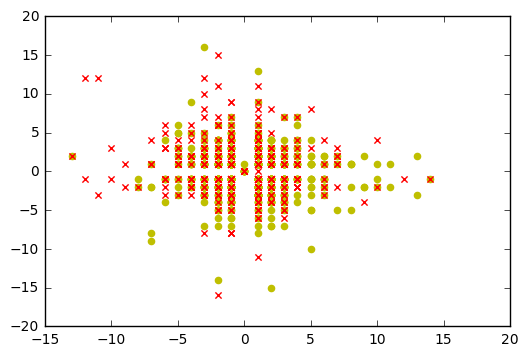

In [17]:
fig = plt.figure()
fig.add_axes()
ax1 = fig.add_subplot(111)
ax2 = fig.add_subplot(111)
ax1.scatter(win_df['Home_Streak'].tolist(), win_df['Visitor_Streak'].tolist(), marker='o', c='y', edgecolor='face')
ax2.scatter(loss_df['Home_Streak'].tolist(), loss_df['Visitor_Streak'].tolist(), marker='x', c='r')
plt.show()

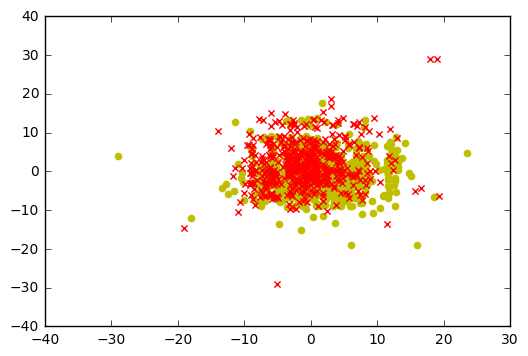

In [18]:
fig = plt.figure()
fig.add_axes()
ax1 = fig.add_subplot(111)
ax2 = fig.add_subplot(111)
ax1.scatter(win_df['Home_AvgSpread'].tolist(), win_df['Visitor_AvgSpread'].tolist(), marker='o', c='y', edgecolor='face')
ax2.scatter(loss_df['Home_AvgSpread'].tolist(), loss_df['Visitor_AvgSpread'].tolist(), marker='x', c='r')
plt.show()

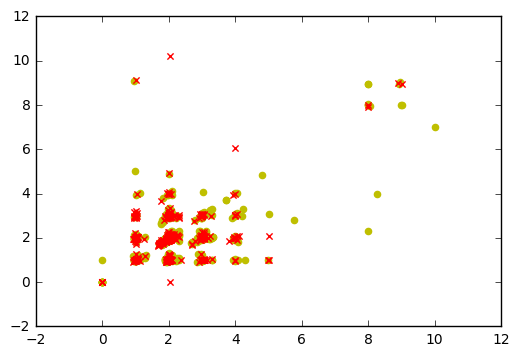

In [19]:
fig = plt.figure()
fig.add_axes()
ax1 = fig.add_subplot(111)
ax2 = fig.add_subplot(111)
ax1.scatter(win_df['Home_DaysPast'].tolist(), win_df['Visitor_DaysPast'].tolist(), marker='o', c='y', edgecolor='face')
ax2.scatter(loss_df['Home_DaysPast'].tolist(), loss_df['Visitor_DaysPast'].tolist(), marker='x', c='r')
plt.show()

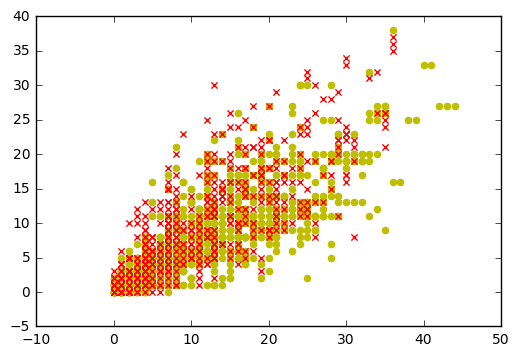

In [20]:
fig = plt.figure()
fig.add_axes()
ax1 = fig.add_subplot(111)
ax2 = fig.add_subplot(111)
ax1.scatter(win_df['Home_HomeWins'].tolist(), win_df['Visitor_VisitorWins'].tolist(), marker='o', c='y', edgecolor='face')
ax2.scatter(loss_df['Home_HomeWins'].tolist(), loss_df['Visitor_VisitorWins'].tolist(), marker='x', c='r')
plt.show()

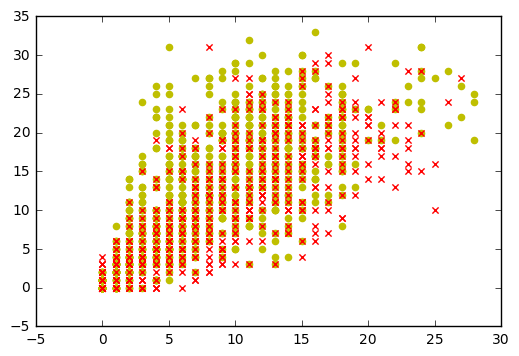

In [63]:
fig = plt.figure()
fig.add_axes()
ax1 = fig.add_subplot(111)
ax2 = fig.add_subplot(111)
ax1.scatter(win_df['Home_HomeLosses'].tolist(), win_df['Visitor_VisitorLosses'].tolist(), marker='o', c='y', edgecolor='face')
ax2.scatter(loss_df['Home_HomeLosses'].tolist(), loss_df['Visitor_VisitorLosses'].tolist(), marker='x', c='r')
plt.show()

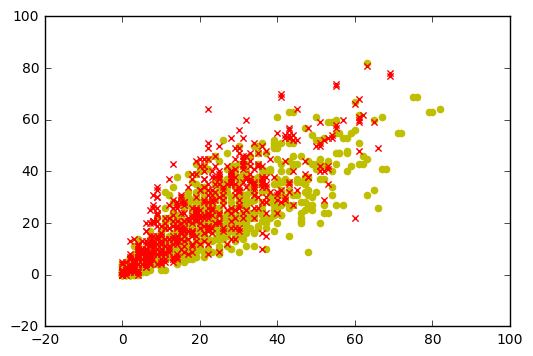

In [21]:
fig = plt.figure()
fig.add_axes()
ax1 = fig.add_subplot(111)
ax2 = fig.add_subplot(111)
ax1.scatter(win_df['Home_TotalWins'].tolist(), win_df['Visitor_TotalWins'].tolist(), marker='o', c='y', edgecolor='face')
ax2.scatter(loss_df['Home_TotalWins'].tolist(), loss_df['Visitor_TotalWins'].tolist(), marker='x', c='r')
plt.show()

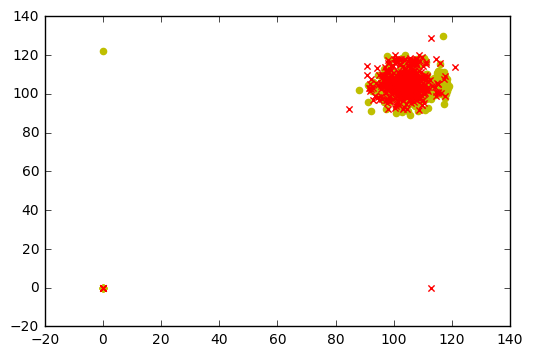

In [22]:
fig = plt.figure()
fig.add_axes()
ax1 = fig.add_subplot(111)
ax2 = fig.add_subplot(111)
ax1.scatter(win_df['Home_AvgPts'].tolist(), win_df['Visitor_AvgPts'].tolist(), marker='o', c='y', edgecolor='face')
ax2.scatter(loss_df['Home_AvgPts'].tolist(), loss_df['Visitor_AvgPts'].tolist(), marker='x', c='r')
plt.show()

In [31]:
print('Home team WR: ', 763 / (546 + 763))

Home team WR:  0.5828877005347594


In [100]:
from math import log

def eval_logloss(y, p):
    if len(y) == len(p):
        N = len(y)
    else:
        return
    
    logloss = 0
    for i in range(N):
        logloss = logloss - 1/N * (y[i] * log(p[i]) + (1-y[i]) * log(1-p[i]))
    
    return logloss

In [116]:
import random
random.seed()
pvals = []
yvals = df['Winner'].tolist()
for i in yvals:
    #pvals.append(0.58)
    pvals.append(random.randrange(35, 65, 1) / 100)

In [117]:
from math import log

loglosslist = []
logloss = 0
for i in range(len(yvals)):
    logloss = eval_logloss(yvals[:i], pvals[:i])
    loglosslist.append(logloss)

In [118]:
logloss

0.7099324446366172

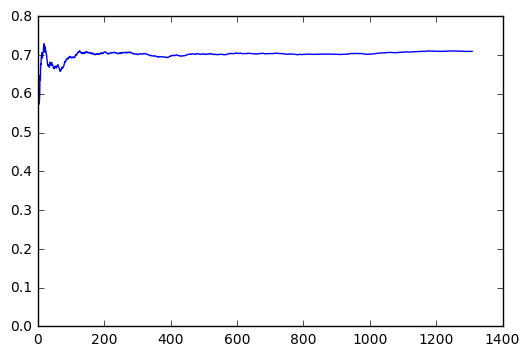

In [119]:
fig = plt.figure()
fig.add_axes()
ax1 = fig.add_subplot(111)
ax1.plot(range(len(loglosslist)), loglosslist)
plt.show()